In [80]:
%matplotlib inline

import os
import tarfile
from six.moves import urllib
from zlib import crc32
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (OrdinalEncoder, OneHotEncoder, StandardScaler)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [81]:
DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2/blob/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz?raw=true"

In [82]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [83]:
fetch_housing_data()

In [84]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [85]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [86]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [87]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [88]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


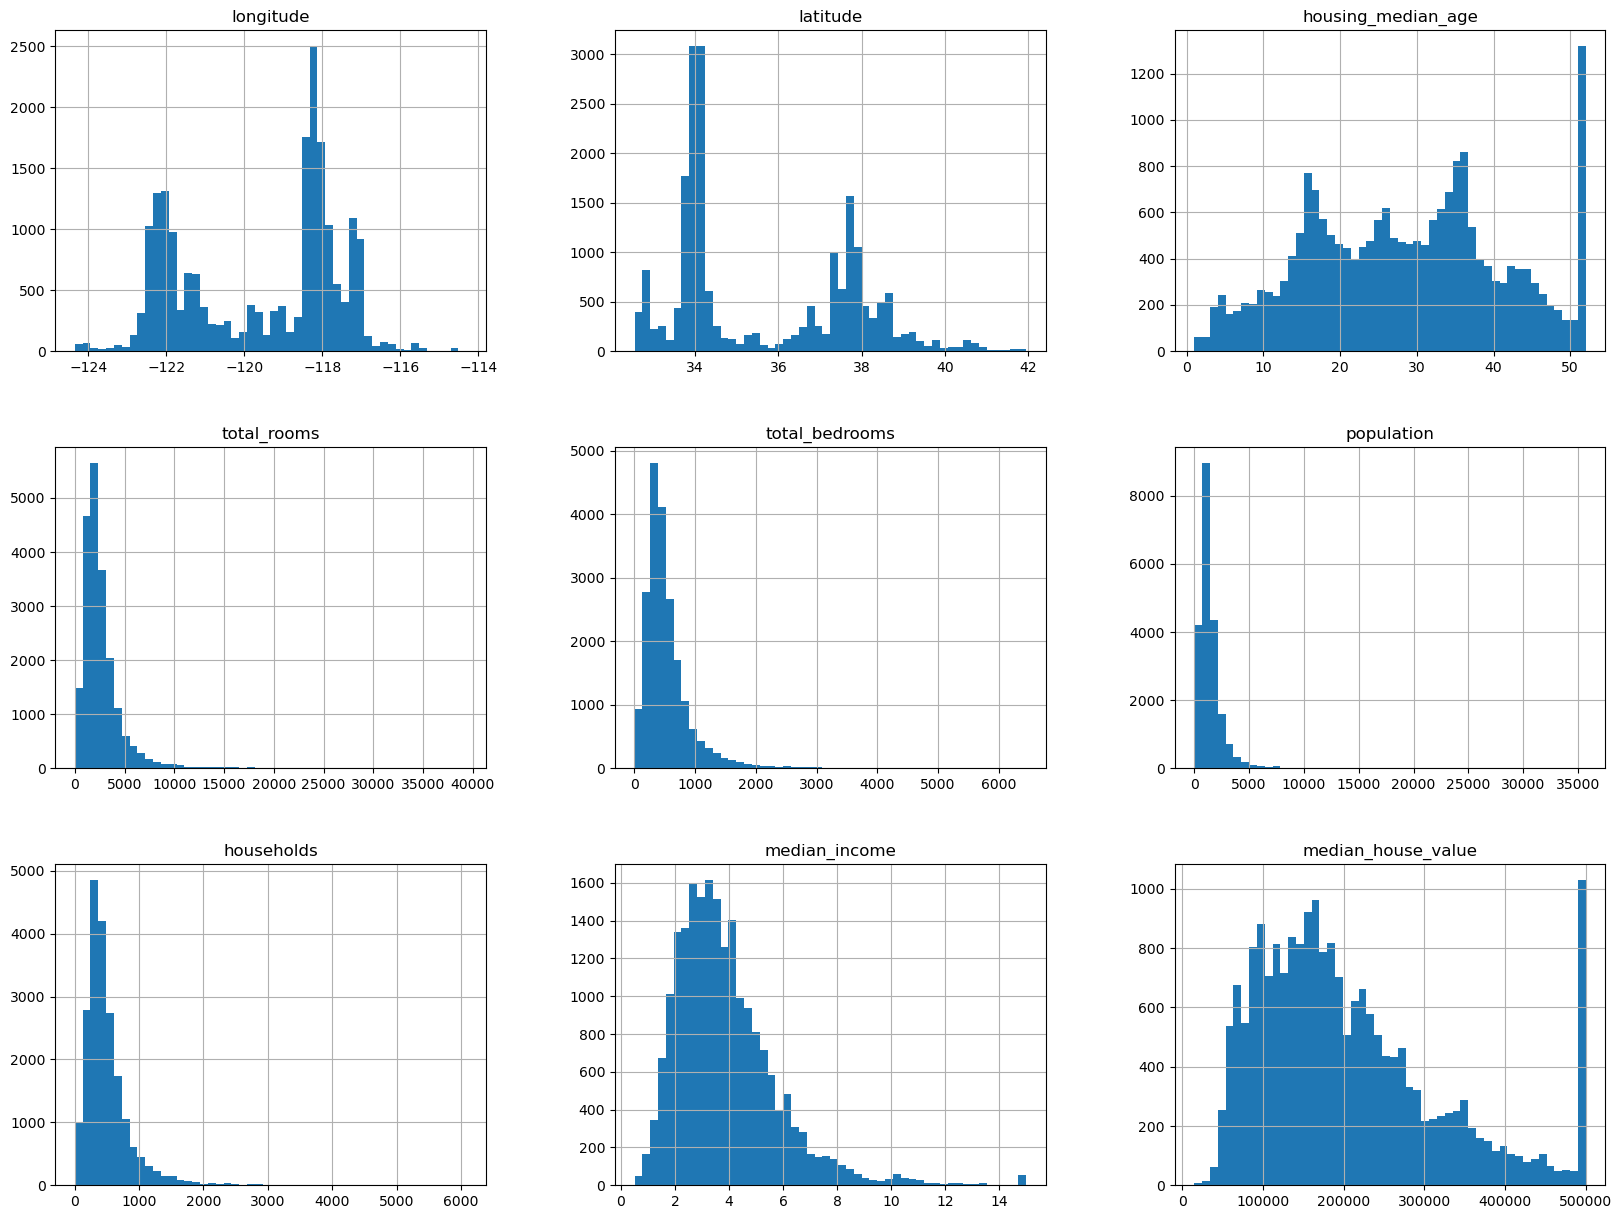

In [89]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [90]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [91]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

<AxesSubplot: >

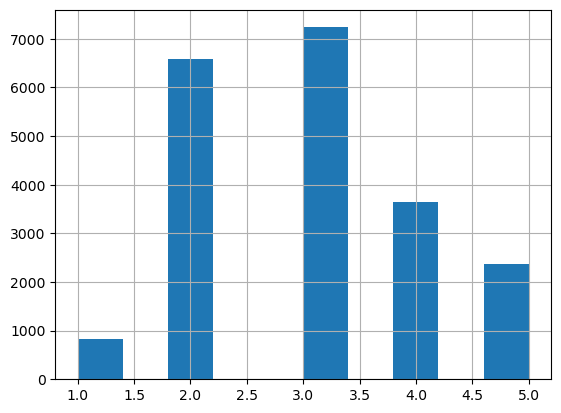

In [92]:
housing["income_cat"].hist()

In [93]:
from sklearn.model_selection import StratifiedShuffleSplit

In [94]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [95]:
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [96]:
 strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [97]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", inplace=True, axis=1)

In [98]:
housing = strat_train_set.copy()

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

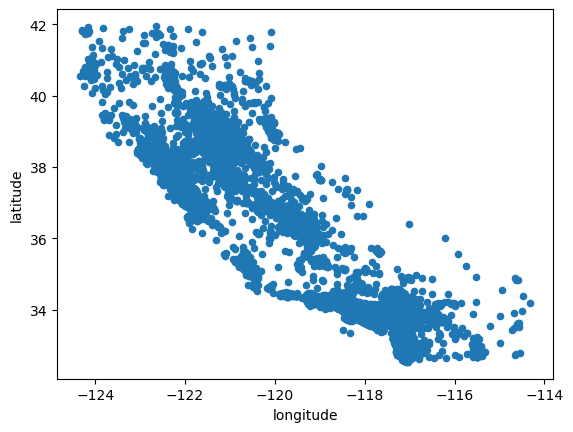

In [99]:
housing.plot(x="longitude", y="latitude", kind="scatter")

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

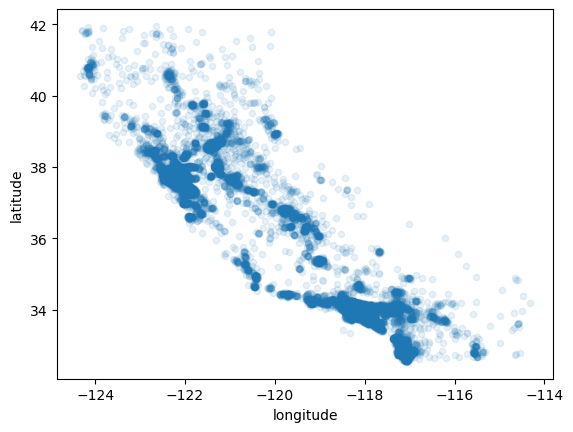

In [100]:
housing.plot(x="longitude", y="latitude", kind="scatter", alpha=0.1)

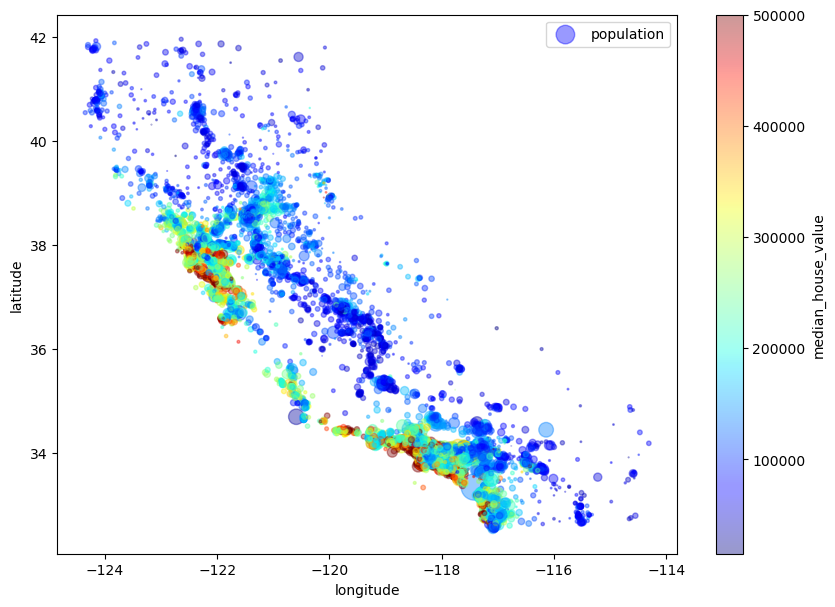

In [101]:
housing.plot(x="longitude", y="latitude", kind="scatter", alpha=0.4,
             s=housing["population"]/100, label="population",
             figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()
plt.show()

## Looking for Correlations

In [102]:
corr_matrix = housing.corr(numeric_only=True)

In [103]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [104]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

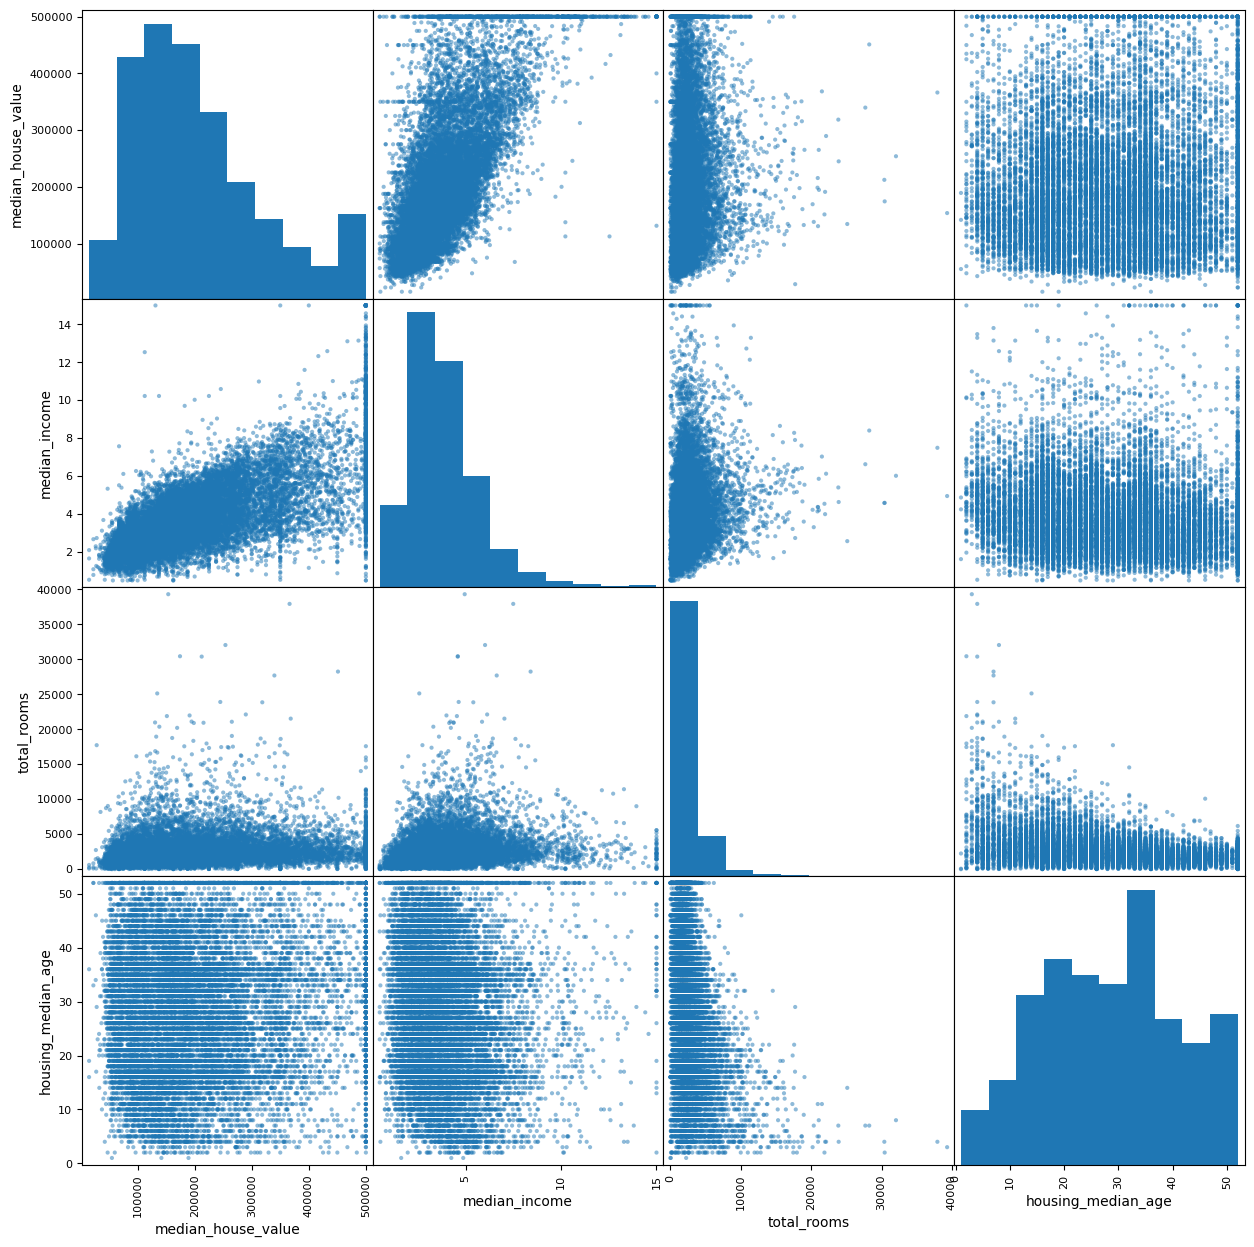

In [105]:
scatter_matrix(housing[attributes], figsize=(15, 15))
plt.show()

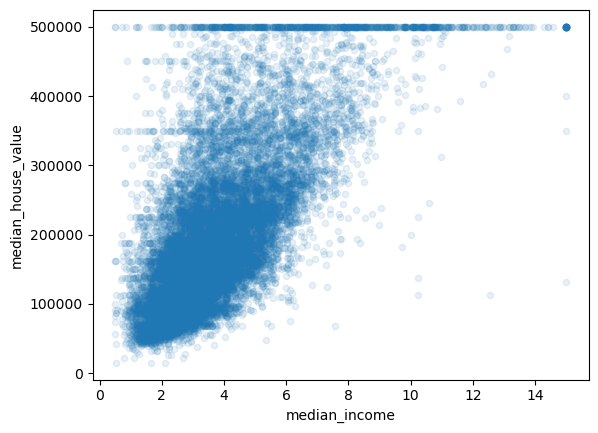

In [106]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()

In [107]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


## Experimenting with Attribute Combinations

In [108]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [109]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## Prepare the Data for Machine Learning Algorithms

In [110]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [111]:
imputer = SimpleImputer(strategy="median")

In [112]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [113]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [114]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [115]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [116]:
X = imputer.transform(housing_num)

In [117]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

## Handling Text and Categorical Attributes

In [118]:
 housing_cat = housing[["ocean_proximity"]]

In [119]:
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [120]:
ordinal_encoder = OrdinalEncoder()

In [121]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [122]:
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [123]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [124]:
cat_encoder = OneHotEncoder()

In [125]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [126]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

## Custom Transformers

In [127]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [128]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Transformation Pipelines

In [129]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), 
        ('attribs_adder', CombinedAttributesAdder()), 
        ('std_scaler', StandardScaler())
    ])

In [130]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [131]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [132]:
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])

In [133]:
housing_prepared = full_pipeline.fit_transform(housing)

# Select and Train a Model

## Training and Evaluating on the Training Set

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
import joblib

In [135]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [136]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

In [137]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [138]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [139]:
housing_predictions = lin_reg.predict(housing_prepared)

In [140]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [141]:
lin_rmse = np.sqrt(lin_mse)

In [142]:
lin_rmse

68627.87390018745

## Decision Tree

In [143]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [144]:
housing_predictions = tree_reg.predict(housing_prepared)

In [145]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)

In [146]:
tree_rmse = np.sqrt(tree_mse)

In [147]:
tree_rmse

0.0

## Better Evaluation Using Cross-Validation

In [148]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [149]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [150]:
display_scores(tree_rmse_scores)

Scores: [73833.48522831 69785.58212351 66525.93375567 71400.61802642
 70396.42885857 76071.30492109 71939.17946025 72392.00286817
 68846.29417218 71219.2089909 ]
Mean: 71241.00384050587
Standard deviation: 2503.7780954311042


In [151]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [152]:
lin_rmse_scores = np.sqrt(-lin_scores)

In [153]:
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.328209818065


## Random Forest

In [154]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [155]:
random_forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [156]:
random_forest_rmse_scores = np.sqrt(-random_forest_scores)

In [157]:
display_scores(random_forest_rmse_scores)

Scores: [51349.42444793 48843.50415473 47124.83458135 52053.53435081
 47304.41770589 52107.34169498 52218.77352833 49909.32130275
 48567.66286656 54052.98703376]
Mean: 50353.18016670992
Standard deviation: 2225.110587662598


In [158]:
lin_reg.score(housing_prepared, housing_labels)

0.6481553634454353

# Fine-Tune Your Model

## Grid Search

In [166]:
param_grid = [
     {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
     {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

forest_reg = RandomForestRegressor()

In [167]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [168]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [169]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [170]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [171]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63744.1028380434 {'max_features': 2, 'n_estimators': 3}
55870.7897265644 {'max_features': 2, 'n_estimators': 10}
52738.60294193199 {'max_features': 2, 'n_estimators': 30}
60334.668125638476 {'max_features': 4, 'n_estimators': 3}
52696.422917584 {'max_features': 4, 'n_estimators': 10}
50495.63268896133 {'max_features': 4, 'n_estimators': 30}
59298.55482832728 {'max_features': 6, 'n_estimators': 3}
52226.14757193769 {'max_features': 6, 'n_estimators': 10}
49889.34968044445 {'max_features': 6, 'n_estimators': 30}
59384.434055778394 {'max_features': 8, 'n_estimators': 3}
52050.595886749186 {'max_features': 8, 'n_estimators': 10}
50114.64003536705 {'max_features': 8, 'n_estimators': 30}
61442.41239503676 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54250.53757150896 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59824.48411906298 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52268.626502527215 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

# Ensemble Methods

## Analyze the Best Models and Their Errors

In [173]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.61883705e-02, 6.50553908e-02, 4.44422016e-02, 1.66085442e-02,
       1.71421242e-02, 1.75425269e-02, 1.62557254e-02, 3.33681962e-01,
       7.41953885e-02, 1.07965636e-01, 6.83419438e-02, 1.64194221e-02,
       1.36759589e-01, 1.64030116e-04, 4.11239527e-03, 5.12475025e-03])

In [174]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3336819616432581, 'median_income'),
 (0.13675958908013372, 'INLAND'),
 (0.10796563578504827, 'pop_per_hhold'),
 (0.07618837048427683, 'longitude'),
 (0.07419538854344476, 'rooms_per_hhold'),
 (0.06834194375490696, 'bedrooms_per_room'),
 (0.06505539075034067, 'latitude'),
 (0.044442201566922204, 'housing_median_age'),
 (0.017542526872731185, 'population'),
 (0.01714212416724363, 'total_bedrooms'),
 (0.01660854417313903, 'total_rooms'),
 (0.016419422106696367, '<1H OCEAN'),
 (0.01625572544440547, 'households'),
 (0.005124750245150945, 'NEAR OCEAN'),
 (0.004112395266662358, 'NEAR BAY'),
 (0.00016403011563948143, 'ISLAND')]

# Evaluate Your System on the Test Set

In [175]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [176]:
final_rmse

47658.89815330372

In [177]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors))) 

array([45687.17074581, 49552.23078346])

## Exercise: 1

In [180]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   5.5s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.4s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.5s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.7s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.8s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.2s
[CV] END ..............................C=30.0, kernel=linear; total time=   8.3s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.2s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.8s
[CV] END .............................C=100.0, kernel=linear; total time=   5.6s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [181]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70286.6183460516

In [182]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

## Exercise: 2

In [184]:
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   9.2s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   9.5s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   9.9s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   9.6s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   9.6s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  19.1s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  20.4s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  18.5s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  18.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  17.7s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000017E4984F8E0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000017E48ECC880>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [185]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54751.69009256623

In [186]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

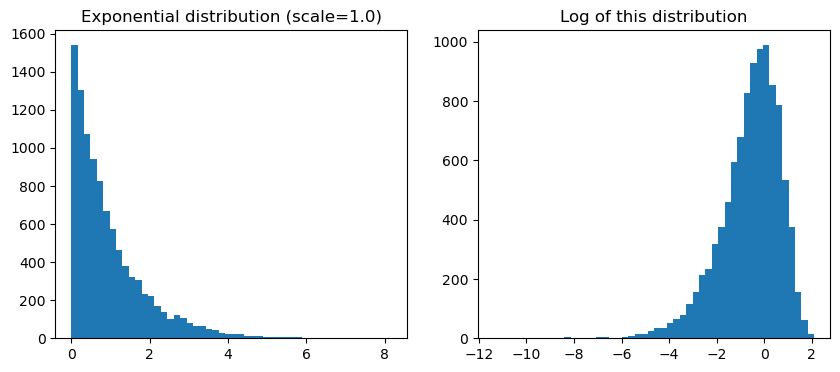

In [187]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

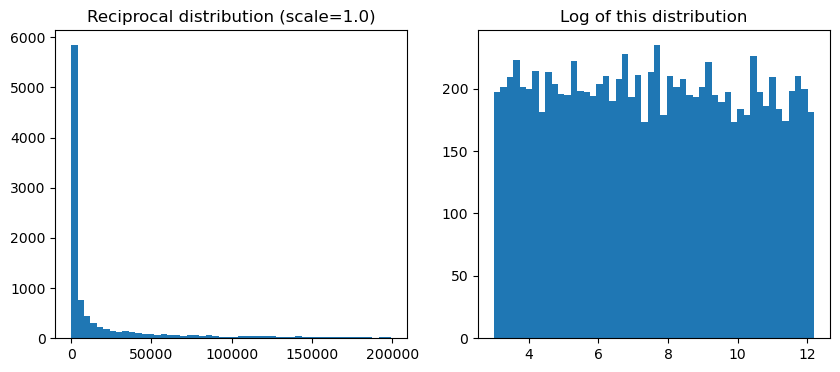

In [188]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()